 Simon Karl Gatzweiler & Emeline Bagoris

## Classification on the Covertype Dataset

You can load the Covertype from https://www.kaggle.com/uciml/forest-cover-type-dataset

The samples in this dataset correspond to 30×30m patches of forest in the US, collected for the task of predicting each patch’s cover type, i.e. the dominant species of tree. There are seven covertypes, making this a multiclass classification problem. Each sample has 54 features, described on the dataset’s homepage. Some of the features are boolean indicators, while others are discrete or continuous measurements.

sklearn.datasets.fetch_covtype will load the covertype dataset; it returns a dictionary-like object with the feature matrix in the data member and the target values in target. The dataset will be downloaded from the web if necessary.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, KFold, StratifiedKFold, RepeatedStratifiedKFold
from statistics import mean
from sklearn.metrics import confusion_matrix, roc_auc_score

warnings.filterwarnings('ignore')

The dataset is a bigger than the ones we have dealtso far, so you may choose to take a small part of data first to work on it. For that purpose, you may use `train_test_split` to partition the data and choose a small sample from that. You can use 

`X_data,X_drop,y_data,y_drop=train_test_split(X,y,
                                             random_state=0,train_size=0.01)`

1. Visualize the univariate distribution of each feature, and the distribution of the target.

In [ ]:
df = pd.read_csv("covtype.csv")
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


<AxesSubplot:xlabel='Cover_Type', ylabel='Size'>

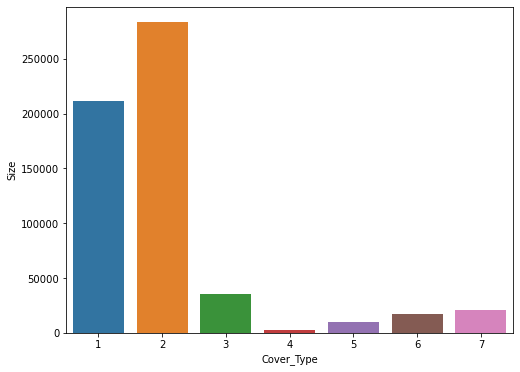

In [ ]:
# Distribution of the target
class_dist=df.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Size',data=class_label)

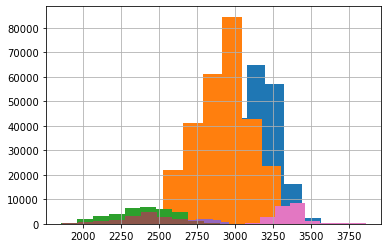

In [ ]:
# teach said to use histogram when the label is categorical and scatter plot when its a continuous value
df.groupby('Cover_Type').Elevation.hist();

In [ ]:
df.columns
#df.info()

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [ ]:
y = df.Cover_Type
X = df.drop(['Cover_Type'],axis=1)

In [ ]:
X_data,X_drop,y_data,y_drop=train_test_split(X,y, random_state=0,train_size=0.01)

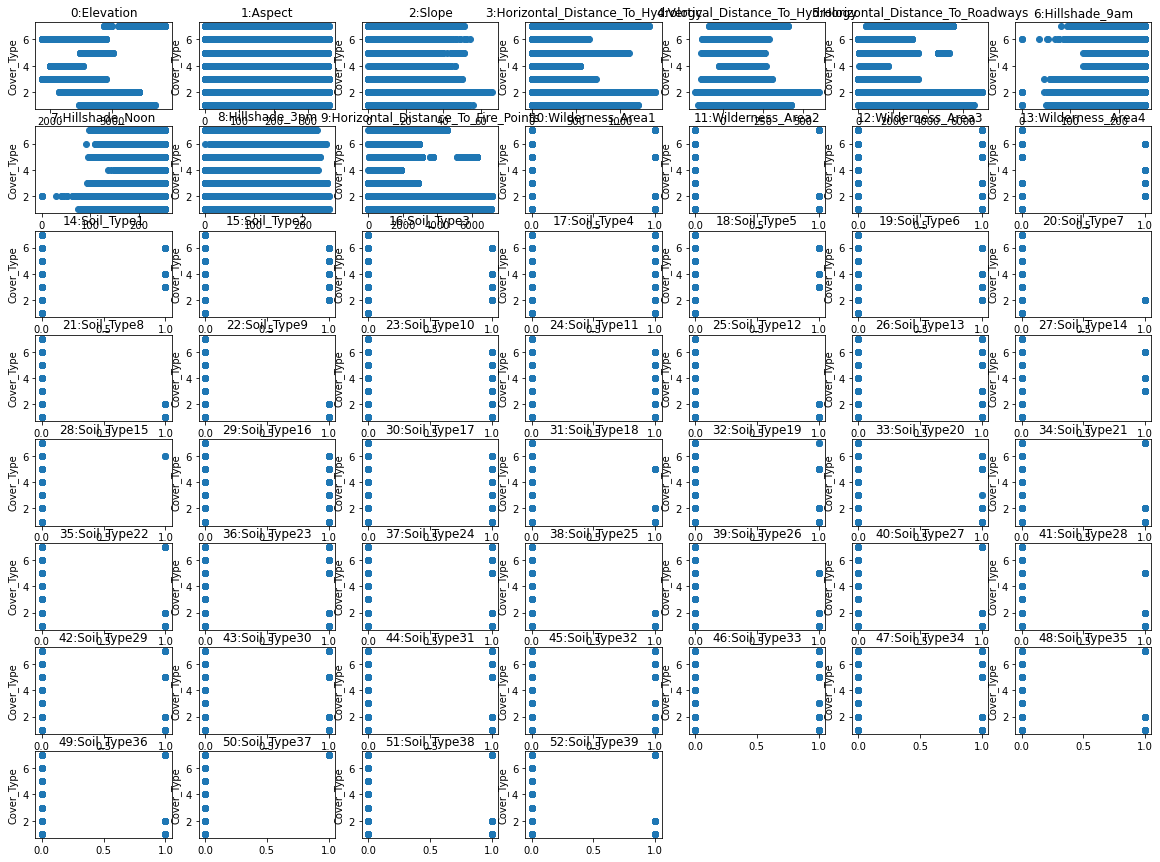

In [ ]:
fig, axes =plt.subplots(8,7,figsize=(20,15))

for i, ax in enumerate(axes.ravel()):
    if i > 52:
        ax.set_visible(False)
        continue
    X_col=X.iloc[:,i]
    ax.scatter(X_col,y)
    ax.set_title(f"{i}:{X.columns[i]}")
    ax.set_ylabel("Cover_Type")
plt.show()

2. Split data into training and test set. Evaluate KNeighborsClassifier and Logistic Regression using cross-validation. Use StratifiedKFold. How different are the results? Are there any missing values? How does scaling the data with StandardScaler influence the results?

In [ ]:
# We split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, train_size=0.7, random_state=30)

In [ ]:
# We define a function to find the best number of neighbors for knn
from sklearn.model_selection import KFold, StratifiedKFold

neighbors = np.arange(1,15,2)
cross_val_scores =[]
skfold=StratifiedKFold(n_splits = 10, shuffle=False)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn,X_train,y_train,cv=skfold)
    cross_val_scores.append(np.mean(scores))
print(cross_val_scores)  

print("best cross-validation score:{:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors:{}".format(best_n_neighbors))

knn_best = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn_best.fit(X_train,y_train)

print("test-set score:{:.3f}".format(knn_best.score(X_test,y_test)))

[0.6974939785284613, 0.6896249137628448, 0.6866837728906694, 0.6834836179663766, 0.6822557219108945, 0.6770954115781702, 0.6719260236501616]
best cross-validation score:0.697
best n_neighbors:1
test-set score:0.713


In [ ]:
logreg = LogisticRegression()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
lst_accu_stratified = []

for train_index, test_index in skf.split(X_data, y_data): 
    X_train_fold, X_test_fold = X_data.iloc[train_index,:], X_data.iloc[test_index,:]
    y_train_fold, y_test_fold = y_data.iloc[train_index], y_data.iloc[test_index]
    logreg.fit(X_train_fold, y_train_fold) 
    lst_accu_stratified.append(logreg.score(X_test_fold, y_test_fold))

print('Maximum Accuracy',max(lst_accu_stratified)) 
print('Minimum Accuracy:',min(lst_accu_stratified)) 
print('Overall Accuracy:',mean(lst_accu_stratified))

Maximum Accuracy 0.6437177280550774
Minimum Accuracy: 0.6041308089500861
Overall Accuracy: 0.6247848537005164


The accuracy of the KNN is better than the logistic regression with a best score of 71% for knn with 1 neighbor against 62% for logistic regression. 

In [ ]:
df.isnull().sum()
#Fortunately, there are no missing values 

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [ ]:
cont_df=df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
binary_df=df.loc[:,'Wilderness_Area1':'Soil_Type40']

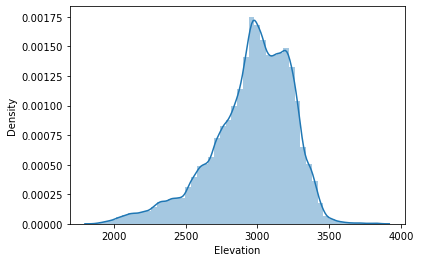

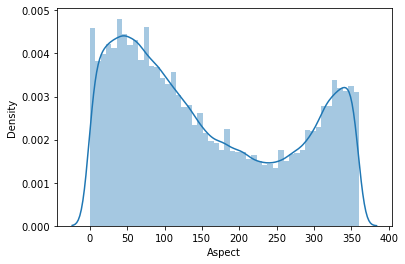

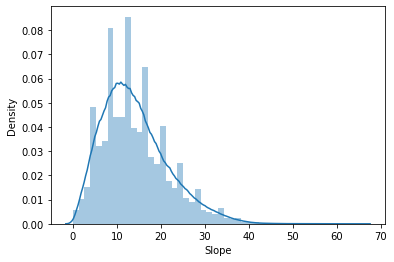

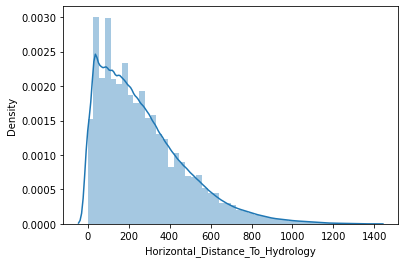

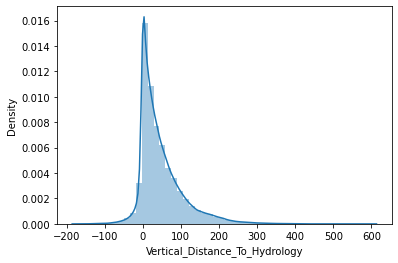

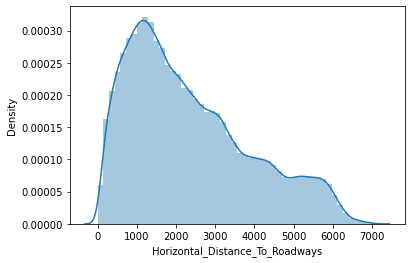

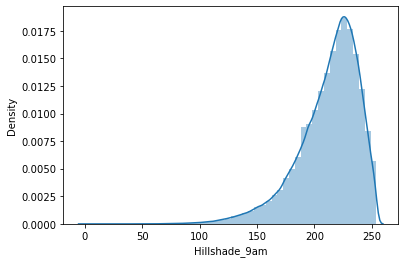

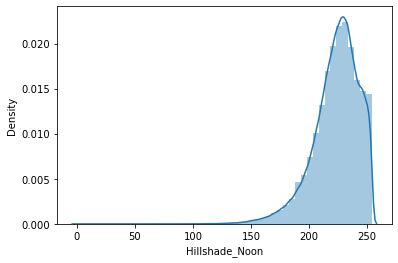

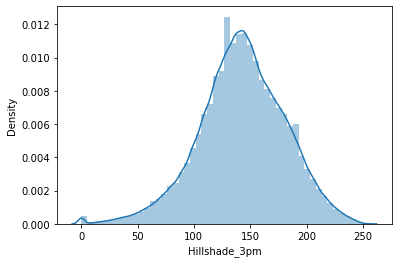

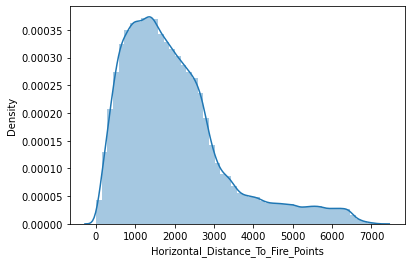

In [ ]:
for i, col in enumerate(cont_df.columns):
    plt.figure(i)
    sns.distplot(cont_df[col])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [ ]:
# Standardize the training set using StandardScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Test the accuracy of the KNN model on the standardized training set
neighbors = np.arange(1,15,2)
cross_val_scores =[]
skfold=StratifiedKFold(n_splits = 10, shuffle=False)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn,X_train_scaled,y_train,cv=skfold)
    cross_val_scores.append(np.mean(scores))
print(cross_val_scores)  

print("best cross-validation score:{:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors:{}".format(best_n_neighbors))

knn_best = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn_best.fit(X_train,y_train)

print("test-set score:{:.3f}".format(knn_best.score(X_test,y_test)))

[0.6950315295142881, 0.6915959622856175, 0.6997052807397635, 0.6957746819815785, 0.6933025501991018, 0.6957571319640286, 0.6893652945377082]
best cross-validation score:0.700
best n_neighbors:5
test-set score:0.700


In [ ]:
logreg = LogisticRegression()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
lst_accu_stratified = []

for train_index, test_index in skf.split(scaler.fit_transform(X_data), y_data): 
    X_train_fold, X_test_fold = X_data.iloc[train_index,:], X_data.iloc[test_index,:]
    y_train_fold, y_test_fold = y_data.iloc[train_index], y_data.iloc[test_index]
    logreg.fit(X_train_fold, y_train_fold) 
    lst_accu_stratified.append(logreg.score(X_test_fold, y_test_fold))

print('Maximum Accuracy',max(lst_accu_stratified)) 
print('Minimum Accuracy:',min(lst_accu_stratified)) 
print('Overall Accuracy:',mean(lst_accu_stratified))

Maximum Accuracy 0.6437177280550774
Minimum Accuracy: 0.6041308089500861
Overall Accuracy: 0.6247848537005164


The accuracy didn't changed after standardization which is weird.

3. Tune the parameter `n_neighbors` using GridSearchCV. Do the results improve? Visualize the performance as function of the parameter for the model. For visualization, you can plot the model performance versus different `k` values.

In [ ]:
my_param_grid = {'n_neighbors': np.arange(1,15,2)}
grid = GridSearchCV(KNeighborsClassifier(),param_grid=my_param_grid,cv=skfold)

In [ ]:
grid_search = grid.fit(X_train,y_train)

In [ ]:
grid_search.best_score_

0.6974939785284613

In [ ]:
grid_search.best_params_

{'n_neighbors': 1}

In [ ]:
grid_search.score(X_test,y_test)
#gridsearch doesnt really improve the results

0.713302752293578

In [ ]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.01506455, 0.01476212, 0.01480415, 0.01565819, 0.01750515,
       0.01621077, 0.01544726]), 'std_fit_time': array([0.00053472, 0.0003862 , 0.00083299, 0.00100134, 0.00286037,
       0.00132177, 0.00092678]), 'mean_score_time': array([0.01625047, 0.01845253, 0.01960998, 0.02124252, 0.02423294,
       0.02357152, 0.02335958]), 'std_score_time': array([0.00063879, 0.00067221, 0.00078367, 0.00089702, 0.00463671,
       0.00149458, 0.00167911]), 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}, {'n_neighbors': 9}, {'n_neighbors': 11}, {'n_neighbors': 13}], 'split0_test_score': array([0.7027027 , 0.70515971, 0.70761671, 0.69041769, 0.7002457 ,
       0.67567568, 0.68304668]), 'split1_test_score': array([0.73218673, 0.70515971, 0.67813268, 0.67813

4. Change the cross-validation strategy from `StratifiedKFold` to `Kfold` with shuffling. You can check ScikitLearn's tutorials to learn more about shuffling. Do the parameters that are found change? You can also try (Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

neighbors = np.arange(1,15,2)
cross_val_scores =[]
kfold=KFold(n_splits = 10, shuffle=True)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn,X_train,y_train,cv=skfold)
    cross_val_scores.append(np.mean(scores))
print(cross_val_scores)  

print("best cross-validation score:{:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print("best n_neighbors:{}".format(best_n_neighbors))

knn_best = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn_best.fit(X_train,y_train)

print("test-set score:{:.3f}".format(knn_best.score(X_test,y_test)))

[0.6974939785284613, 0.6896249137628448, 0.6866837728906694, 0.6834836179663766, 0.6822557219108945, 0.6770954115781702, 0.6719260236501616]
best cross-validation score:0.697
best n_neighbors:1
test-set score:0.713


The best number of neighbors didn't change but the accuracy increased a bit. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3936dca8-42ca-41a4-aad6-22f3c31c57fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>